# Others

- **[glob](#glob)**
- **[os and pathlib](#os-and-pathlib)**
- **[Create folders](#Create-folders)**
    - [os.path.exists()](#os.path.exists())
    - [os.makedirs()](#os.makedirs())
    - [cv2.adaptiveThreshold()](#cv2.adaptiveThreshold())
- **[tqdm](#tqdm)**
- **[nibabel](#nibabel)**
    - [nib.load()](#nib.load())
- **[Multiprocessing](#Multiprocessing)**
    - [.map()](#.map())
    - [Pool.map() & Pool.imap()](#Pool.map()-&-Pool.imap())
- **[Load Python Script in Jupyter](#Load-Python-Script-in-Jupyter)**

## glob

In [37]:
%load_ext autoreload
%autoreload 2

# import glob -> glob.glob('*')
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# glob.glob('*')

['tmdb_5000_credits.csv',
 'sample_ndarray.npy',
 'pdf_files.pdf',
 'wave_plot.ipynb',
 'text_pic.jpg:Zone.Identifier',
 'crop_load_rgb.png',
 'rp_msk',
 'cropped_lenna.png',
 'bimodal_sample.png:Zone.Identifier',
 'lenna.png',
 'runtime_budget_scatter.png',
 'matplotlib.ipynb',
 'animation_test.gif',
 'saved_seaborn.png',
 'text_pic.jpg',
 'python_basic.ipynb',
 'lenna.png:Zone.Identifier',
 'animation_test2.gif',
 'tmdb_5000_credits.csv:Zone.Identifier',
 'cos_sin.png',
 'save_multifig_sample.pdf',
 'others.ipynb',
 'opencv.ipynb',
 'numpy.ipynb',
 'seaborn.ipynb',
 'sample_dict.npy',
 'tmdb_5000_movies_profit_sorted.csv',
 'tmdb_5000_movies.csv',
 'pandas.ipynb',
 'rp_im',
 'bimodal_sample.png',
 'tmdb_5000_movies.csv:Zone.Identifier']

In [6]:
glob('*.png')

['crop_load_rgb.png',
 'cropped_lenna.png',
 'lenna.png',
 'runtime_budget_scatter.png',
 'saved_seaborn.png',
 'cos_sin.png',
 'bimodal_sample.png']

In [9]:
glob('public-covid-data/*/*')

['public-covid-data/rp_msk/3.nii.gz',
 'public-covid-data/rp_msk/1.nii.gz',
 'public-covid-data/rp_msk/9.nii.gz',
 'public-covid-data/rp_msk/2.nii.gz',
 'public-covid-data/rp_msk/6.nii.gz',
 'public-covid-data/rp_msk/8.nii.gz',
 'public-covid-data/rp_msk/7.nii.gz',
 'public-covid-data/rp_msk/4.nii.gz',
 'public-covid-data/rp_msk/5.nii.gz',
 'public-covid-data/rp_im/3.nii.gz',
 'public-covid-data/rp_im/1.nii.gz',
 'public-covid-data/rp_im/9.nii.gz',
 'public-covid-data/rp_im/2.nii.gz',
 'public-covid-data/rp_im/6.nii.gz',
 'public-covid-data/rp_im/8.nii.gz',
 'public-covid-data/rp_im/7.nii.gz',
 'public-covid-data/rp_im/4.nii.gz',
 'public-covid-data/rp_im/5.nii.gz']

In [10]:
glob('public-covid-data/rp_im/[5-9]*')

['public-covid-data/rp_im/9.nii.gz',
 'public-covid-data/rp_im/6.nii.gz',
 'public-covid-data/rp_im/8.nii.gz',
 'public-covid-data/rp_im/7.nii.gz',
 'public-covid-data/rp_im/5.nii.gz']

## os and pathlib

In [12]:
import os
from pathlib import Path
# import pathlib -> pathlib.Path()

In [22]:
p = Path('public-covid-data/')

In [25]:
sub_p = list(p.iterdir())[0]

In [26]:
list(sub_p.iterdir())

[PosixPath('public-covid-data/rp_msk/3.nii.gz'),
 PosixPath('public-covid-data/rp_msk/1.nii.gz'),
 PosixPath('public-covid-data/rp_msk/9.nii.gz'),
 PosixPath('public-covid-data/rp_msk/2.nii.gz'),
 PosixPath('public-covid-data/rp_msk/6.nii.gz'),
 PosixPath('public-covid-data/rp_msk/8.nii.gz'),
 PosixPath('public-covid-data/rp_msk/7.nii.gz'),
 PosixPath('public-covid-data/rp_msk/.ipynb_checkpoints'),
 PosixPath('public-covid-data/rp_msk/4.nii.gz'),
 PosixPath('public-covid-data/rp_msk/5.nii.gz')]

In [31]:
target_file = list(sub_p.glob('*[6-9]*'))[0]

In [34]:
folder_p, file_name = os.path.split(target_file)

In [35]:
folder_p

'public-covid-data/rp_msk'

In [36]:
file_name

'9.nii.gz'

In [37]:
os.path.join(folder_p, file_name)

'public-covid-data/rp_msk/9.nii.gz'

## Create folders

In [38]:
# public-covid-data/new_folder

p = Path('public-covid-data/')
new_folder_name = 'new_folder'
new_folder_path = os.path.join(p, new_folder_name)
new_folder_path

'public-covid-data/new_folder'

### os.path.exists()

In [41]:
os.path.exists(new_folder_path)

True

### os.makedirs()

In [40]:
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

## tqdm

In [1]:
from tqdm import tqdm

In [9]:
import time
sum_ = 0
before = time.time()
for i in tqdm(range(int(1e7)), position=0):
    sum_ += 1
print(sum_)
after = time.time()
print(f"It took {after - before}")

100%|██████████| 10000000/10000000 [00:04<00:00, 2438415.72it/s]

10000000
It took 4.103015184402466


In [10]:
# columns: path_im, filename: path_mask
# path_im -> 'public-covid-data/rp_im/5.nii.gz'
# filename -> '5.nii.gz'
# path_mask -> 'public-covid-data/rp_msk/5.nii.gz'

In [39]:
p = Path("/mnt/share/004_coding/Input/public-covid-data")
df_list = []
for folder in p.iterdir():
    path_list = [p.as_posix() for p in list(folder.iterdir())]
    file_list = [os.path.split(i)[1] for i in path_list]
    df_list.append(pd.DataFrame({'path': path_list, 'filename': file_list}))

In [49]:
df = df_list[0].merge(df_list[1], on='filename', suffixes=('_im',"_msk"))
for idx, row in tqdm(df.iterrows(), total=len(df)):
    print(f"image path for {row['path_im']} is here {row['filename']}")


100%|██████████| 9/9 [00:00<00:00, 1554.28it/s]

image path for /mnt/share/004_coding/Input/public-covid-data/rp_im/3.nii.gz is here 3.nii.gz
image path for /mnt/share/004_coding/Input/public-covid-data/rp_im/8.nii.gz is here 8.nii.gz
image path for /mnt/share/004_coding/Input/public-covid-data/rp_im/5.nii.gz is here 5.nii.gz
image path for /mnt/share/004_coding/Input/public-covid-data/rp_im/7.nii.gz is here 7.nii.gz
image path for /mnt/share/004_coding/Input/public-covid-data/rp_im/6.nii.gz is here 6.nii.gz
image path for /mnt/share/004_coding/Input/public-covid-data/rp_im/2.nii.gz is here 2.nii.gz
image path for /mnt/share/004_coding/Input/public-covid-data/rp_im/4.nii.gz is here 4.nii.gz
image path for /mnt/share/004_coding/Input/public-covid-data/rp_im/1.nii.gz is here 1.nii.gz
image path for /mnt/share/004_coding/Input/public-covid-data/rp_im/9.nii.gz is here 9.nii.gz


In [22]:
folder = list(p.iterdir())[0]
sub_p = list(folder.iterdir())[0]
sub_p.as_posix()
str(sub_p)

In [28]:
a = "/mnt/share/004"
os.path.split(a)

('/mnt/share', '004')

## nibabel

NIfTI (Neuroimaging Informatics Technology Initiative) with Python for brain MRI images

In [50]:
import nibabel as nib

### nib.lead()

In [76]:
path_im = df['path_im'].iloc[0]
path_msk = df['path_msk'].iloc[0]
# im_nifti = nib.load(path)
# data = im_nifti.get_fdata()
# data.shape
# data_t = np.transpose(data)
# data_t.shape

In [77]:
# data = load_nifti(path)
def load_nifti(path):
    im_nifti = nib.load(path)
    data = im_nifti.get_fdata()
    data = np.transpose(data)
    return data

In [78]:
data_im = load_nifti(path_im)
data_msk = load_nifti(path_msk)

In [79]:
data_msk.shape

(418, 630, 630)

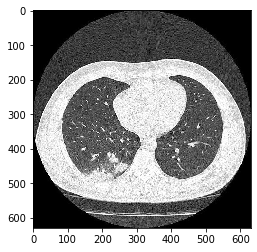

In [90]:
plt.imshow(data_im[150], cmap='gray')

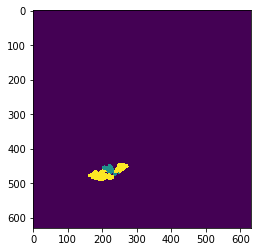

In [89]:
plt.imshow(data_msk[150])

In [91]:
# 0: background, 1: ground-glass, 2: consolidation, 3: pleural effusion
np.unique(data_msk)

array([0., 1., 2.])

In [93]:
df['slide_num'] = np.nan

In [97]:
for idx, row in tqdm(df.iterrows(), total=len(df)):
    data = load_nifti(row['path_im'])
    slice_num = data.shape[0]
    df.loc[idx, 'slice_num'] = slice_num


100%|██████████| 9/9 [01:24<00:00,  9.41s/it]


In [96]:
df

,path_im,filename,path_msk,slide_num,slice_num
0,/mnt/share/004_coding/Input/public-covid-data/...,3.nii.gz,/mnt/share/004_coding/Input/public-covid-data/...,NaN,418.0
1,/mnt/share/004_coding/Input/public-covid-data/...,8.nii.gz,/mnt/share/004_coding/Input/public-covid-data/...,NaN,45.0
2,/mnt/share/004_coding/Input/public-covid-data/...,5.nii.gz,/mnt/share/004_coding/Input/public-covid-data/...,NaN,66.0
3,/mnt/share/004_coding/Input/public-covid-data/...,7.nii.gz,/mnt/share/004_coding/Input/public-covid-data/...,NaN,42.0
4,/mnt/share/004_coding/Input/public-covid-data/...,6.nii.gz,/mnt/share/004_coding/Input/public-covid-data/...,NaN,42.0
5,/mnt/share/004_coding/Input/public-covid-data/...,2.nii.gz,/mnt/share/004_coding/Input/public-covid-data/...,NaN,39.0
6,/mnt/share/004_coding/Input/public-covid-data/...,4.nii.gz,/mnt/share/004_coding/Input/public-covid-data/...,NaN,39.0
7,/mnt/share/004_coding/Input/public-covid-data/...,1.nii.gz,/mnt/share/004_coding/Input/public-covid-data/...,NaN,45.0
8,/mnt/share/004_coding/Input/public-covid-data/...,9.nii.gz,/mnt/share/004_coding/Input/public-covid-data/...,NaN,93.0


## Multiprocessing

In [103]:
from multiprocessing import Pool, cpu_count
import time

### .map()

In [101]:
def square(n):
    return n ** 2
params = [1, 2, 3, 4]
list(map(square, params))
# [square(p) for p in params]

[1, 4, 9, 16]

### Pool.map() & Pool.imap()

In [105]:
p = Pool(processes=cpu_count()-1)

def wait_sec(sec):
    time.sleep(sec)
    return sec ** 2

In [116]:
before = time.time()
# list(tqdm(p.imap(wait_sec, [1, 5, 3]), total=3))
for i in p.imap(wait_sec, [1, 5, 3]):
    print(f"{i}: {time.time() - before} sec")

# for i in p.imap_unordered(wait_sec, [1, 5, 3]):
#     print(f"{i}: {time.time() - before} sec")
    
after = time.time()
print(f"It took {after - before} sec")
p.close()
p.join()

1: 1.0033988952636719 sec
9: 3.0052616596221924 sec
25: 5.007384777069092 sec
It took 5.0077056884765625 sec


In [111]:
results

[1, 25, 9]

In [ ]:
def multiply(a, b):
    return a * b

def wrap_multiply(args):
    return multiply(*args)

param1 = [1, 2, 3, 4]
param2 = [10, 30, 70, 20]
job_args = list(zip(param1, param2))
# [10, 60, 210, 80]

p = Pool(processes=cpu_count()-1)
results = list(p.imap(wrap_multiply, job_args))
p.close()
p.join()

## Load Python Script in Jupyter

In [13]:
%load_ext autoreload
%autoreload 2

from util import multiply2
# import util
# from <foldername> import <filename>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
multiply2(3, 2)

3 x 2 = 6!!!!


6